<a href="https://colab.research.google.com/github/lim-jr/ESAA/blob/main/%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B81_%EC%9E%84%EC%9E%AC%EB%A0%B9_%EA%B0%9C%EB%B4%89%EC%8B%9C%EA%B8%B0%EC%9C%84%EC%A3%BC_%EC%88%98%EC%A0%954.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

%matplotlib notebook
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
train = pd.read_csv('/content/drive/MyDrive/PyColab_ESAA/데이터셋/movies_train.csv')

#### 3-1) 개봉월에 따른 평균 관객 수

In [4]:
# release_time 날짜형으로 바꾸기
train['release_time']=pd.to_datetime(train['release_time'])

# release_month 달 추출
train['release_month']=train['release_time'].dt.month

In [83]:
# seaborn 라이브러리로 그래프 그리기 전, 색깔 지정

## month 색깔 지정
color_m = sns.color_palette('hls', len(train['release_month'].unique()))

## genre 색깔 지정
order_g = train['genre'].unique()
order_g = np.sort(order_g) # 한글 순 정렬 (범례 순서와 같게)
color_g= sns.color_palette('hls', len(order_g))

Text(0, 0.5, '관객수')

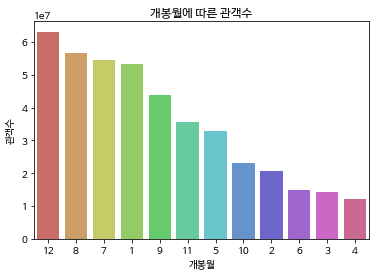

In [8]:
# 개봉월에 따른 관객수를 바차트로 나타내기

train_mon = train[['release_month', 'box_off_num']].groupby('release_month').sum().sort_values('box_off_num', ascending=False).reset_index()
ax = sns.barplot(x='release_month', y='box_off_num', data=train_mon, palette=color_m, 
                 order = train_mon['release_month'].value_counts().index)
ax.set_title('개봉월에 따른 관객수')
ax.set_xlabel('개봉월')
ax.set_ylabel('관객수')

* 분석결과
  1. 연말 기간인 12월
  2. 여름방학 기간인 7,8월
  3. 연초 기간인 1월
  4. 추석 기간인 9월  
  순으로 관객수가 많은 것으로 나타났다. 

#### 3-2) 개봉시기에 따른 장르의 인기도 추이

* 관객수가 많은 특정 개봉시기에 어떤 장르가 인기가 많은지 알아보고자 한다. 

>-'인기가 많다'의 척도는 관객수로 정한다.  
>-관객수가 많은 특정 개봉시기는 다음과 같다. 
  1. 연말 기간인 12월
  2. 여름방학 기간인 7,8월
  3. 연초 기간인 1월
  4. 추석 기간인 9월 

Text(0, 0.5, '관객수')

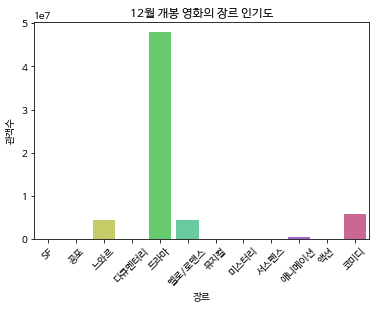

In [112]:
## 월별로 장르의 인기도 살펴보기
# 연말 기간인 12월에 개봉된 영화의 장르 인기로를 바차트로 나타내기

train_mon12 = train[train['release_month']==12][['title','genre', 'box_off_num']]
train_mon12_sum = train_mon12.groupby('genre').sum().reset_index()
train_mon12_sum.columns = ['genre', 'num_movies']

ax = plt.subplots()
ax = sns.barplot(x='genre', y='num_movies', data=train_mon12_sum, errwidth=0, order=order_g, palette=color_g)
plt.xticks(rotation=45)
ax.set_title('12월 개봉 영화의 장르 인기도')
ax.set_xlabel('장르')
ax.set_ylabel('관객수')

* 연말 기간인 12월에 개봉된 영화에서 드라마 장르가 인기가 압도적으로 많다. 
* 느와르, 멜로/로맨스, 코미디 장르가 그 다음으로 인기도가 높았지만 대체적으로 낮은 편이다. 

Text(0, 0.5, '관객수')

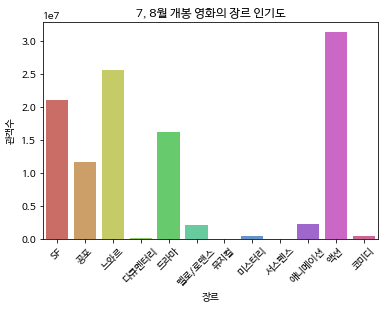

In [113]:
## 월별로 장르의 인기도 살펴보기
# 여름방학 기간인 7, 8월에 개봉된 영화의 장르 인기도를 바차트로 나타내기

train_mon78 = train[(train['release_month']==7)|(train['release_month']==8)][['title','genre', 'box_off_num']]
train_mon78_sum = train_mon78.groupby('genre').sum().reset_index()
train_mon78_sum.columns = ['genre', 'num_movies']

ax = plt.subplots()
ax = sns.barplot(x='genre', y='num_movies', data=train_mon78_sum, errwidth=0, order=order_g, palette=color_g)
plt.xticks(rotation=45)
ax.set_title('7, 8월 개봉 영화의 장르 인기도')
ax.set_xlabel('장르')
ax.set_ylabel('관객수')

* 여름방학 기간인 7,8월에 개봉된 영화에서 액션 장르가 인기가 가장 많다. 
* 느와르, SF, 드라마 장르가 그 다음으로 인기도가 높다. 

Text(0, 0.5, '관객수')

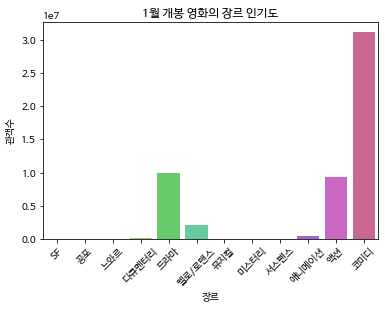

In [110]:
# 월별로 장르의 인기도 살펴보기
## 설연휴 기간인 1월에 개봉된 영화의 장르 인기로를 바차트로 나타내기

train_mon1 = train[train['release_month']==1][['title','genre', 'box_off_num']]
train_mon1_sum = train_mon1.groupby('genre').sum().reset_index()
train_mon1_sum.columns = ['genre', 'num_movies']

ax = plt.subplots()
ax = sns.barplot(x='genre', y='num_movies', data=train_mon1_sum, errwidth=0, order=order_g, palette=color_g)
plt.xticks(rotation=45)
ax.set_title('1월 개봉 영화의 장르 인기도')
ax.set_xlabel('장르')
ax.set_ylabel('관객수')

* 연초 기간인 1월에 개봉된 영화에서 코미디 장르가 압도적으로 가장 인기가 많다.
* 드라마, 액션 장르가 그 다음으로 인기도가 높지만 대체로 낮은 편이다. 

Text(0, 0.5, '관객수')

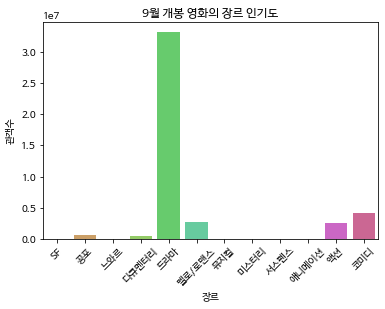

In [114]:
# 월별로 장르의 인기도 살펴보기
## 추석연휴 기간인 9월에 개봉된 영화의 장르 인기로를 바차트로 나타내기

train_mon9 = train[train['release_month']==9][['title','genre', 'box_off_num']]
train_mon9_sum = train_mon9.groupby('genre').sum().reset_index()
train_mon9_sum.columns = ['genre', 'num_movies']

ax = plt.subplots()
ax = sns.barplot(x='genre', y='num_movies', data=train_mon9_sum, errwidth=0, order=order_g, palette=color_g)
plt.xticks(rotation=45)
ax.set_title('9월 개봉 영화의 장르 인기도')
ax.set_xlabel('장르')
ax.set_ylabel('관객수')

* 추석 기간인 9월에 개봉된 영화에서 드라마 장르가 압도적으로 가장 인기가 많다.
* 멜로/로맨스, 액션, 코미디가 그다음으로 인기도가 높았지만, 대체적으로 낮은 편이다.  

Text(0, 0.5, '관객수')

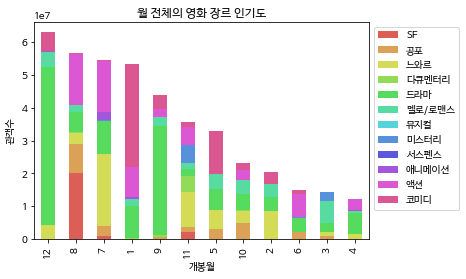

In [88]:
# 월 전체의 장르 인기도를 한꺼번에 살펴보기
## 누적 바차트로 나타내기

train_mon_g = train.groupby(['release_month','genre'])['box_off_num'].sum().reset_index()

train_mon_g_p = train_mon_g.pivot(index='release_month', columns='genre', values='box_off_num') # 피벗화
train_mon_g_p = train_mon_g_p.loc[train_mon['release_month'].value_counts().index] # 관객수 많은 월 순서대로 정렬
train_mon_g_p.plot.bar(stacked=True, color=color_g) # 누적 막대그래프로
plt.legend(loc=2, bbox_to_anchor=(1, 1)) # 범례 위치
plt.title('월 전체의 영화 장르 인기도')
plt.xlabel('개봉월')
plt.ylabel('관객수')

* 월별로 따로 분석한 그래프의 결과와 같이  
  12월에 드라마, 7,8월에 액션, 1월에 코미디, 9월에 드라마 장르가 인기가 가장 많은 것을 한번에 확인할 수 있다.

#### 3-3) 배급사의 개봉시기 분포

In [53]:
# 영화상영수가 많은 상위5개 배급사의 개봉시기 분포 살펴보기
## 배급사별로 개봉시기 분포 나타내기 

# 영화상영수 많은 상위5 배급사 확인
train_dist_top = train['distributor'].value_counts().head(5) 

# 그룹화
train_dist_gr = train.groupby(['distributor', 'release_month'])['title'].count().reset_index() 
train_dist_gr.columns = ['distributor', 'release_month', 'num_movies']

# 그룹화 중 상위5배급사에 해당하는 행추출
train_dist_top_gr = train_dist_gr[train_dist_gr['distributor'].isin(train_dist_top.index)].copy() 

In [54]:
# 상위5개 배급사 데이터셋 따로 추출
top1 = train_dist_top_gr[train_dist_top_gr['distributor']=='CJ 엔터테인먼트']
top2 = train_dist_top_gr[train_dist_top_gr['distributor']=='롯데엔터테인먼트']
top3 = train_dist_top_gr[train_dist_top_gr['distributor']=='(주)NEW']
top4 = train_dist_top_gr[train_dist_top_gr['distributor']=='(주)마운틴픽쳐스']
top5 = train_dist_top_gr[train_dist_top_gr['distributor']=='(주)쇼박스']

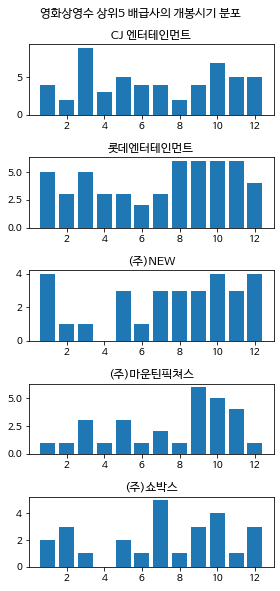

In [69]:
# 한면에 그래프 그리기
fig = plt.figure(figsize=(4,8))

ax1 = fig.add_subplot(5,1,1)
ax2 = fig.add_subplot(5,1,2)
ax3 = fig.add_subplot(5,1,3)
ax4 = fig.add_subplot(5,1,4)
ax5 = fig.add_subplot(5,1,5)

ax1.bar(top1['release_month'], top1['num_movies'])
ax1.set_title('CJ 엔터테인먼트')

ax2.bar(top2['release_month'], top2['num_movies'])
ax2.set_title('롯데엔터테인먼트')

ax3.bar(top3['release_month'], top3['num_movies'])
ax3.set_title('(주)NEW')

ax4.bar(top4['release_month'], top4['num_movies'])
ax4.set_title('(주)마운틴픽쳐스')

ax5.bar(top5['release_month'], top5['num_movies'])
ax5.set_title('(주)쇼박스')

fig.suptitle('영화상영수 상위5 배급사의 개봉시기 분포', y=1.02)

fig.tight_layout()

* 영화상영수가 많은 배급사의 경우,  
  상반기, 하반기 달에 위로 볼록하고, 중앙이 아래로 패인 쌍봉형태의 그래프를 보인다. 
* 배급사 전반적으로 상반기보다 하반기에 영화상영수가 더 많다. 

In [ ]:
# 영화상영수가 1개인 배급사의 개봉시기 분포 살펴보기
## 배급사 전체의 개봉시기 분포를 바차트로 나타내기

# 영화상영수가 1개인 배급사 확인
train_dist_count = train['distributor'].value_counts().reset_index()
train_dist_count.columns = ['distributor', 'num_movies']
train_dist_count[train_dist_count['num_movies']==1].count()

distributor    102
num_movies     102
dtype: int64

Text(0, 0.5, '영화상영수')

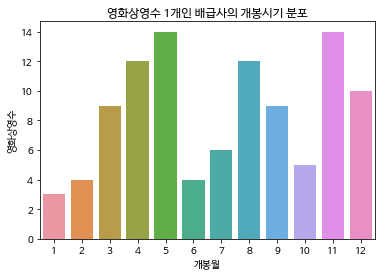

In [61]:
# 영화상영수가 1개인 배급사 데이터셋 따로 추출
train_dist_only1 = train['distributor'].value_counts().tail(102)
train_dist_only1

# 그룹화
train_dist_g = train.groupby(['distributor', 'release_month'])['title'].count().reset_index()
train_dist_g.columns = ['distributor', 'release_month', 'num_movies']

# 그룹화 중 상위5배급사에 해당하는 행추출
train_dist_only1_g = train_dist_g[train_dist_g['distributor'].isin(train_dist_only1.index)].copy()

# 그래프
a = train_dist_only1_g.groupby('release_month').sum().reset_index()
ax = sns.barplot(x='release_month', y='num_movies', data=a)
ax.set_title('영화상영수 1개인 배급사의 개봉시기 분포')
ax.set_xlabel('개봉월')
ax.set_ylabel('영화상영수')

* 영화상영수가 1개인 배급사의 경우,  
  영화상영수가 많은 배급사와 마찬가지로,  
  상반기, 하반기 달에 위로 볼록하고, 중앙이 아래로 패인 쌍봉형태의 그래프를 보인다.
* 영화상영수가 1개인 배급사의 경우,  
  영화상영수가 많은 배급사와 달리,  
  상반기보다 하반기에 영화상영수가 더 많다고 할 수 없다.